# Data Assignment - Digital Nova Scotia

## Data visualization and insights from Movies and TV Shows form Netflix
### Jose Ancona Segovia

### Part 1

#### 1.1 Data loading

In [1]:
import pandas as pd

The report presents data visualization and insights from the file `movies_shows.csv`, which contains the data from Netfliz content. The first part of the process is to load and present the data as a Dataframe. To do this, the Panda library allows to load the data directly from the CSV file to a dataframe. 

In order to visualize the first five rows, the function `head()` allows to retrieve the number of rows desired. It will return by default the first 5 rows.

In [2]:
# Load file
file = 'movies_shows.csv'

df = pd.read_csv(file)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### 1.2 Data description

Pandas allows to identify the data type of each column of the dataframe, facilitating the analysis. `info()` allows to retrieve the datatype according to each column and the number of non-null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


From the information provided above, it is noticible that some columns have null values. It is possible to obtain the percentage of null values per column using some functions that pandas have. `isna()` returns a dataframe look-alike table with `True` and `False`, where null values are placed or not. After calling that function, it is easy to call `sum()` to aggregate the total amount of null values, and then convert the result in a dataframe.

Using the property `index` it is possible to retrive the total amount of rows in a dataframe. In order to get the total percentages per column, it will be necesary to map the dataframe with the totals of null values. `map` allows to use a function over an itrable data structure. `lambda` allows to use as anonymous function and calculate the percentage. This would be similar to apply the following formula to each entry in the dataframe: $$ \% = \frac{X}{Total\ index}\cdot 100$$

In [4]:
# Count the null values from the dataframe and save them in a new dataframe
df_na = pd.DataFrame((df.isna().sum()),columns=['NaN'])
# Count the number of entries
total_index = len(df.index)
# Get the percentage of null values per column
percentage_list = list(map(lambda x:round((x*100/total_index),2),df_na['NaN'].to_list()))
# Add the list to df_na
df_na['%']=percentage_list
df_na

,NaN,%
show_id,0,0.00
type,0,0.00
title,0,0.00
director,2634,29.91
cast,825,9.37
country,831,9.44
date_added,10,0.11
release_year,0,0.00
rating,4,0.05
duration,3,0.03


Pandas also allows to eliminate all the null values from the dataframe easily. The `dropna()` functions allows to remove all rows with null values and keep the rest of the dataframe in the same variable. At the same time, it is possible to use `reset_index()` to restart the count of the index values in the dataframe.

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


After processing the data, now it is possible to performe EDA. `describe()` function returns information about the columns that contain numeric values. In this case, the only column that the function will return is `release_year`

In [6]:
df.describe()

,release_year
count,5332.000000
mean,2012.742123
std,9.625831
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


#### 1.3 Data maniputlation

Next step is to convert the date format of date_added column to ISO datetime standard. This can be perfomed using a `lambda` funcion and `map()` to convert data inplace and don't add any other column and then eliminate the original. In addition, the library `datetime` has a function that allows to change a string with an specific format into a datetime format. `strptime()` needs as a parameter the format of the string using the table privided in the <a href="https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes">documentation</a>.

This funcion is sensitive to the input's format, in other words, the text has to be on the same structure as defined into the function. For example 'Sepember 1, 2000' works for `%B %d, %Y`, but if an entry has an space as the first characher, the convertion won't work. For that reason, it is important to work first with the dates separetly, and then change them into the main dataframe.

The first step is to create a new dataframe with only the column date_added from the original dataframe.

In [7]:
import datetime as dt

dates = pd.DataFrame(df['date_added'].copy())
dates

,date_added
0,"September 24, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 23, 2021"
4,"September 21, 2021"
...,...
5327,"March 9, 2016"
5328,"November 20, 2019"
5329,"November 1, 2019"
5330,"January 11, 2020"


Now, in order to replace all the values to ISO format, a new function is necesery to change the values while mapping the dataframe. That is why `remove_space()` is created. It allows to iterate over all entries, and if the value starts with and space, it removes the space and replace the entry with the rest of the string.

In [8]:
def remove_space(dataframe):
    for i in dataframe.iloc:
        str = ' '
        if i.values[0][0]==str:
            temp = i.values[0][1:]
            i.values[0]=temp


After declaring the function and run it, it is possible to use `applymap()` over the dataframe dates to change all dates to ISO format. Now, since everything is performed over a dataframe type structure, it is possible to change the values in column date_added by assigning the results of the mapping.

In [9]:
remove_space(dates)
df['date_added']=dates=dates.applymap(lambda x:dt.datetime.strptime(x,"%B %d, %Y").date().isoformat())
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Using the same dataframe `dates`, we can obtain the name of the months in one column and years in other. The first step is to create a copy of the dataframe `dates` and define them as `df_months` and `df_years`. Using the same logic for the processing above, now the `applymap()` function will run the functions `fromisoformat()` to convert the string into datetime type, and then using `strftime()` it is possible to obtain the name of the months and years according the table mentioned above.

In [10]:
df_months = dates.copy()
df_years = dates.copy()
df_months = df_months.applymap(lambda  x:dt.datetime.fromisoformat(x).strftime('%B'))
df_years = df_years.applymap(lambda  x:dt.datetime.fromisoformat(x).strftime('%Y'))
df2 = pd.concat([df_months,df_years], axis=1)
df2.columns=['month_added','year_added']
df = pd.concat([df,df2], axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,September,2021
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,September,2021
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,September,2021
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,September,2021


#### 1.4 Visialization

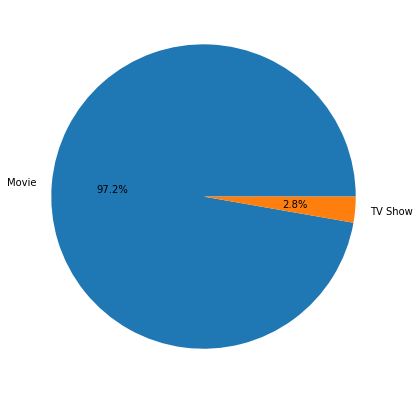

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

y = df['type'].value_counts()
plt.figure(figsize=[9,7])
plt.pie(y,labels=y.index,autopct='%1.1f%%')
plt.show()

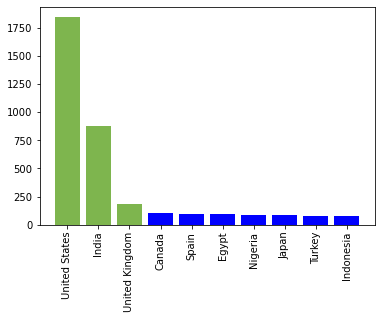

In [12]:
y=df['country'].value_counts().head(10)
c = ['#7eb54e','#7eb54e','#7eb54e','blue','blue','blue','blue','blue','blue','blue']
plt.bar(y.keys(),y.values,color=c)
plt.xticks(rotation=90)
plt.show()


In [13]:
y

United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: country, dtype: int64

In [14]:
labels = y.index
labels

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Egypt',
       'Nigeria', 'Japan', 'Turkey', 'Indonesia'],
      dtype='object')

In [72]:
z = df[['country','type']].copy()
z

,country,type
0,"United States, Ghana, Burkina Faso, United Kin...",Movie
1,United Kingdom,TV Show
2,United States,Movie
3,"Germany, Czech Republic",Movie
4,India,Movie
...,...,...
5327,"United Arab Emirates, Jordan",Movie
5328,United States,Movie
5329,United States,Movie
5330,United States,Movie


In [73]:
# z = z[z['country'].isin(labels)].reset_index(drop=True)
# z

In [86]:
z.groupby(['country','type'])['type'].aggregate('count')

country                                              type   
, France, Algeria                                    Movie       1
Argentina                                            Movie      34
                                                     TV Show     1
Argentina, Brazil, France, Poland, Germany, Denmark  Movie       1
Argentina, Chile                                     Movie       2
                                                                ..
Uruguay, Guatemala                                   Movie       1
Uruguay, Spain, Mexico                               Movie       1
Venezuela                                            Movie       1
Vietnam                                              Movie       7
Zimbabwe                                             Movie       1
Name: type, Length: 637, dtype: int64

In [137]:
new = z.groupby(['country','type']).size()
asd = pd.DataFrame(new)
asd = asd.reset_index()
asd = asd.pivot(index='country',columns='type',values=0).fillna(0).reset_index(drop=False)
sum_=asd['Movie']+asd['TV Show']
asd = pd.concat([asd,pd.DataFrame(sum_,columns=['Total'])],axis=1)
asd = asd.sort_values('Total',ascending=False).reset_index(drop=True)

In [157]:
fig1 = asd.head(10).drop('Total',axis=1)
fig1

,country,Movie,TV Show
0,United States,1819.0,27.0
1,India,868.0,7.0
2,United Kingdom,164.0,19.0
3,Canada,104.0,3.0
4,Spain,84.0,7.0
5,Egypt,90.0,0.0
6,Nigeria,84.0,4.0
7,Japan,73.0,10.0
8,Turkey,74.0,5.0
9,Indonesia,76.0,0.0


<AxesSubplot:xlabel='country'>

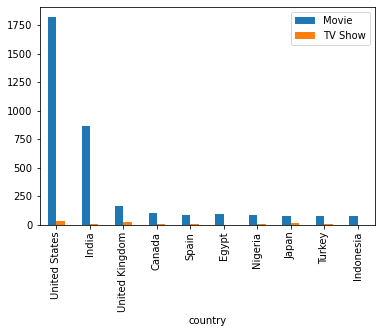

In [158]:
fig1.plot.bar(x='country')